# Исследование объявлений о продаже квартир

### Обзор данных. 

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', delimiter='\t')
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


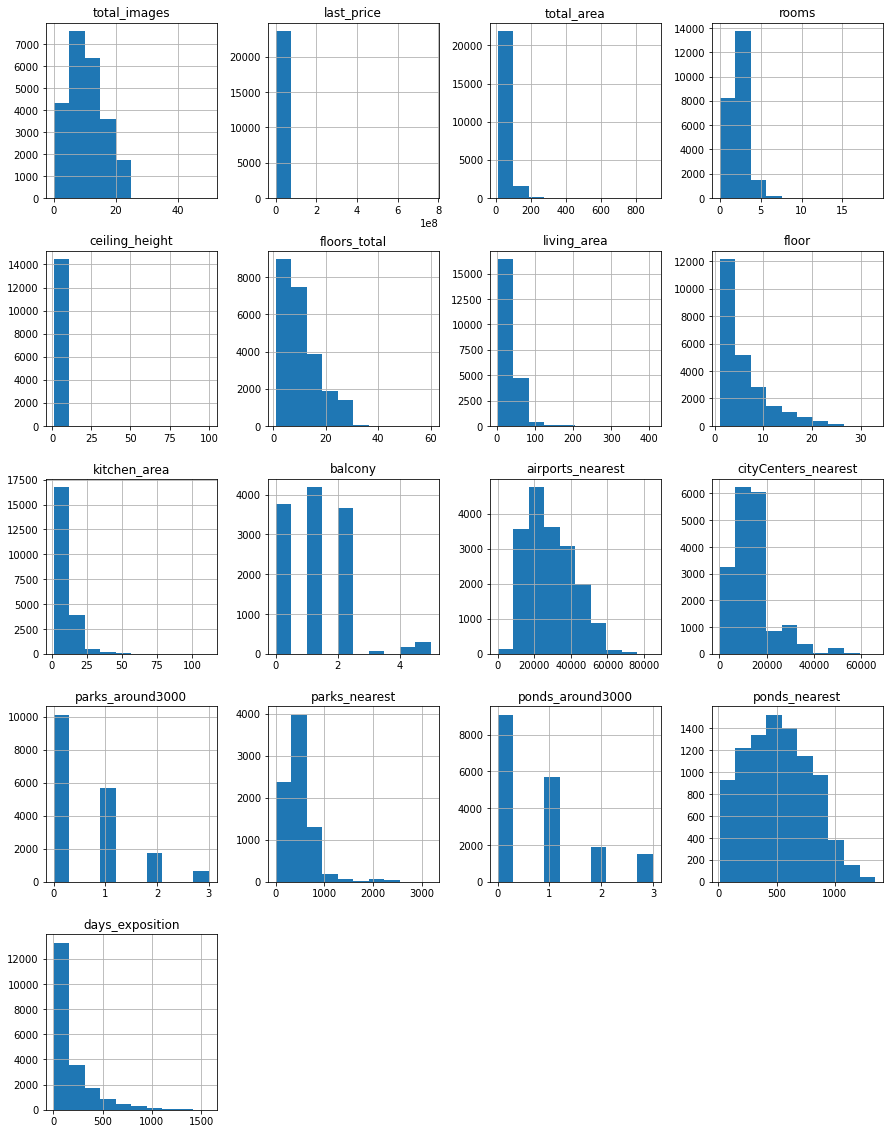

In [2]:
data.hist(figsize=(15, 20));

### Предобработка данных

In [3]:
data.duplicated().sum()

0

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Проверка на дубликаты - основа предобработки данных
</div>

Подсчитаем количество пропущенных значений

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Заполняем пропуки в колонке с высотой потолков медианным значением по всему столбцу**

In [5]:
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
print('Пропусков:', data['ceiling_height'].isna().sum())

Пропусков: 0


**Таким же образом заполняем пропуски в столбце 'floors_total'**

In [6]:
data.loc[data['floors_total'].isna(), 'floors_total'] = data['floors_total'].median()
print('Пропусков:', data['floors_total'].isna().sum())

Пропусков: 0


**Заполним пропуски в столбце 'living_area' через разницу total_area и kitchen_area там, где известа площадь кухни**

In [7]:
print('Пропусков до:', data['living_area'].isna().sum())
data.loc[data['living_area'].isna(), 'living_area'] = data['total_area'] - data['kitchen_area']
print('Пропусков после:', data['living_area'].isna().sum())

Пропусков до: 1903
Пропусков после: 1464


**Сделаем то же самое для пропущенных значений в столбце 'kitchen_area'**

In [8]:
print('Пропусков до:', data['kitchen_area'].isna().sum())
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['total_area'] - data['living_area']
print('Пропусков после:', data['kitchen_area'].isna().sum())

Пропусков до: 2278
Пропусков после: 1464


**Заполним остальные пропyщенные значения в столбцах с площадью кухни и жилой площадью**

In [9]:
#Найдем отношение жилой площади к общей
data['living_total_area_ratio'] = data['living_area'] / data['total_area']


In [10]:
#Заполняем пропуски в 'living_total_area_ratio' медианными значениями для квартир, сгруппированных по количеству комнат
for room in data['rooms'].unique():
    data.loc[(data['living_total_area_ratio'].isna())&(data['rooms']==room), 'living_total_area_ratio'] = (
    data.loc[data['rooms']==room, 'living_total_area_ratio'].median()   
    )

In [11]:
#Заполним оставшиеся пропуски в столбце 'living_area', умножив общую площадь на 'living_total_area_ratio'
data.loc[data['living_area'].isna(), 'living_area'] = data['total_area'] * data['living_total_area_ratio']

In [12]:
#Заполним оставшиеся пропуски в столбце 'kitcken_area' как разницу total_area и living_area
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['total_area'] - data['living_area']

**Заполним пропуски в столбце 'is_apartment' булевыми значениями 'False', т.к. пропуски в данном случае скорее всего говорят о том, что объект не является апартаментами**

In [13]:
print('Пропусков до:', data['is_apartment'].isna().sum())
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False
print('Пропусков после:', data['is_apartment'].isna().sum())

Пропусков до: 20924
Пропусков после: 0


**Также заменим пропущенные значения в столбце 'balcony' на 0**

In [14]:
print('Пропусков до:', data['balcony'].isna().sum())
data.loc[data['balcony'].isna(), 'balcony'] = 0
print('Пропусков после:', data['balcony'].isna().sum())

Пропусков до: 11519
Пропусков после: 0


**Пропуски в колонке 'locality_name' заполним словом 'unknown', т.к. по имеющимся данным нельзя точно определить населенный пункт**

In [15]:
print('Пропуски до:',data['locality_name'].isna().sum())
data.loc[data['locality_name'].isna(), 'locality_name'] = 'unknown'
print('Пропуски после:', data['locality_name'].isna().sum())

Пропуски до: 49
Пропуски после: 0


**Заполним пропуски в колонке 'cityCenters_nearest' медианными значениями с группировкой по населенному пункту**

In [16]:
print('Пропуски до:',data['cityCenters_nearest'].isna().sum())
for locality in data['locality_name'].unique():
    data.loc[(data['cityCenters_nearest'].isna())&(data['locality_name'] == locality), 'cityCenters_nearest'] = (
        data.loc[(data['locality_name'] == locality)&(~data['cityCenters_nearest'].isna()), 'cityCenters_nearest'].median()
        )
print('Пропуски после:',data['cityCenters_nearest'].isna().sum())

Пропуски до: 5519
Пропуски после: 5386


**Большая часть пропусков осталась, заполним их медианным значением по всему столбцу**

In [17]:
print('Пропуски до:',data['cityCenters_nearest'].isna().sum())
data.loc[data['cityCenters_nearest'].isna(), 'cityCenters_nearest'] = data['cityCenters_nearest'].median()
print('Пропуски после:',data['cityCenters_nearest'].isna().sum())

Пропуски до: 5386
Пропуски после: 0


**Пропущенные значения в колонке 'days_exposition' скорее всего говорят о том, что объявление не снято с публикации, оставим пропуски.**

**Также не будем заполнять пропуски в колонках 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', т.к. эта информация не важна для исследования.**   

**Посмотрим на количество пропусков после заполнения**

In [18]:
data.isna().sum()

total_images                   0
last_price                     0
total_area                     0
first_day_exposition           0
rooms                          0
ceiling_height                 0
floors_total                   0
living_area                    0
floor                          0
is_apartment                   0
studio                         0
open_plan                      0
kitchen_area                   0
balcony                        0
locality_name                  0
airports_nearest            5542
cityCenters_nearest            0
parks_around3000            5518
parks_nearest              15620
ponds_around3000            5518
ponds_nearest              14589
days_exposition             3181
living_total_area_ratio        0
dtype: int64

**Изменим тип данных столбца 'first_day_exposition' на datetime64, т.к. здесь указывается дата**

In [19]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

**Изменим тип данных столбца 'floors_total' на целочисленный, т.к. количество этажей во всех домах целое**

In [20]:
data['floors_total'] = data['floors_total'].astype('int') 

**Изменим тип данных столбца 'is_apartment' на булевый, т.к. все значения в нем соответствуют значениям True/False**

In [21]:
data['is_apartment'] = data['is_apartment'].astype('bool') 

**Изменим тип данных столбца 'balcony' на целочисленный, т.к. количество балконов - целое число**

In [22]:
data['balcony'] = data['balcony'].astype('int') 

**Изменить тип столбца 'days_exposition' не получится, т.к. у нас остались пропущенные значения в нем**

In [23]:
data['last_price'] = data['last_price'].astype('int')

**Удалим неявные дубликаты в столбце 'locality_name', оставим только названия населенного пункта, без их типов**

In [24]:
len(data['locality_name'].unique()) #Проверим количество населенных пунктов 

365

In [25]:
#Создаем список с ненужными словами в названии населенных пунктов
unnecessary_words = ['поселок','посёлок ', 'городского типа', 'городской', 'деревня', 'село', 'товарищество', 'садовое', 'садоводческое некоммерческое', 'при железнодорожной станции']
#Удаляем ненужные слова
for word in unnecessary_words:
    data['locality_name'] = data['locality_name'].str.replace(word, '').str.strip()
len(data['locality_name'].unique()) #Выводим количество населенных пунтов после удаления лишних слов 

310

**В столбце 'ceiling_height' есть двузначные значения, например, 27 метров, скорее всего это 2.7 метра, поделим все значения выше 20 метров на 10**  

In [26]:
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

In [27]:
data.loc[data['ceiling_height']>20, 'ceiling_height'] = data.loc[data['ceiling_height'] > 20, 'ceiling_height'] / 10 

**Остались еще аномальные значения, изучим графики**

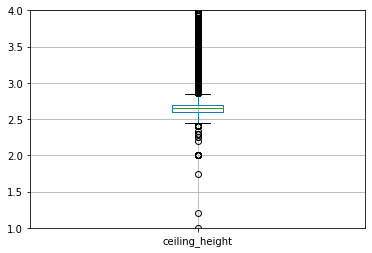

In [28]:
import matplotlib.pyplot as plt 
plt.ylim(1,4)
data.boxplot('ceiling_height');

**По диаграмме размаха выбросы - значения ниже 2.45 и выше 2.85, но если значений ниже 2.45 немного, то значений выше 2.85 достаточно много, посмотрим на гистограмму**

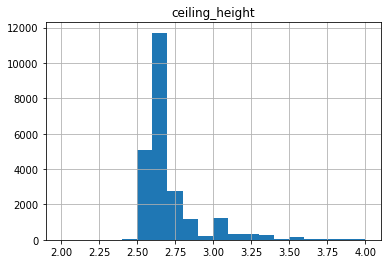

In [29]:
data.hist('ceiling_height', bins = 20, range = (2,4));

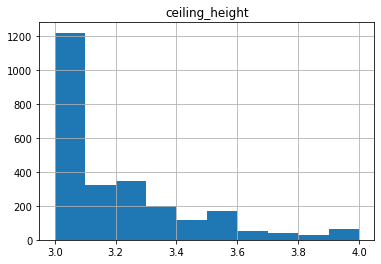

In [30]:
data.hist('ceiling_height', bins = 10, range = (3,4));

**По гистограммам видно, что значений выше 3.1 не так много, так что их можно удалить, также логично, что высота потолков в домах 2.85-3.1 метра не так редко встречается и принимать их за аномальные значения будет ошибкой, поэтому удаляем строки, где высота потолков ниже 2.5 метров и выше 3.1 метра**

In [31]:
data = data.loc[data['ceiling_height'] <= 3.1]
data = data.loc[data['ceiling_height'] >= 2.5]

**Изучим диаграмму размаха для цен на квартиры**

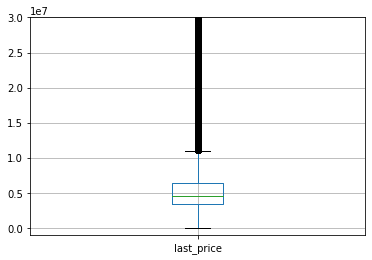

In [32]:
plt.ylim(-1000000,30000000)
data.boxplot('last_price');

**Все квартиры, стоящие дороже 11000000 являются выбросами, необходимо удалить их, посмотрим на их количество**

In [33]:
len(data.query('last_price>11000000'))

1763

**1763 квартиры на фоне их общего количества не так много, поэтому можем их удалить**

**Посмотрим на самые дешевые квартиры** 

In [34]:
data.sort_values('last_price').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_total_area_ratio
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.000000,25,False,...,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,0.293578
17456,7,430000,30.4,2019-04-22,1,2.65,2,16.000000,1,False,...,0,Сланцы,NaN,13095.0,NaN,NaN,NaN,NaN,NaN,0.526316
14911,5,430000,54.0,2018-06-26,2,2.65,3,31.701975,3,False,...,0,станции Свирь,NaN,13095.0,NaN,NaN,NaN,NaN,44.0,0.587074
16274,18,440000,40.0,2018-07-10,1,2.65,5,19.390863,1,False,...,0,Старополье,NaN,13095.0,NaN,NaN,NaN,NaN,45.0,0.484772
9581,7,450000,43.4,2018-08-31,2,2.65,5,30.300000,3,False,...,0,Старополье,NaN,13095.0,NaN,NaN,NaN,NaN,96.0,0.698157
5698,7,450000,42.0,2017-07-31,2,2.65,1,23.000000,1,False,...,0,Будогощь,NaN,13095.0,NaN,NaN,NaN,NaN,233.0,0.547619
17676,0,450000,36.5,2018-02-01,1,2.65,5,17.300000,4,False,...,1,Ям-Тесово,NaN,13095.0,NaN,NaN,NaN,NaN,120.0,0.473973
16219,14,450000,38.5,2018-07-11,2,2.65,2,22.602334,1,False,...,0,Вахнова Кара,NaN,13095.0,NaN,NaN,NaN,NaN,45.0,0.587074
21912,0,470000,37.0,2018-02-18,1,2.65,3,17.936548,3,False,...,0,Совхозный,NaN,13095.0,NaN,NaN,NaN,NaN,45.0,0.484772
18867,1,470000,41.0,2018-02-11,1,2.65,5,32.000000,3,False,...,0,Выскатка,NaN,13095.0,NaN,NaN,NaN,NaN,46.0,0.780488


**Самая дешевая квартира стоит 12190 рублей, но квартира не может столько стоить, особенно в Санкт-Петерберге, скорее всего это 12 миллионов рублей, нормальная цена для квартиры площадью 109 метров, поэтому удаляем все квартиры, стоящие дороже 11 миллионов и изменим значение самое дешевой квартиры на 12 миллионов**

In [35]:
data = data.loc[data['last_price'] <= 11000000]
data.loc[data['last_price'] == data['last_price'].min(), 'last_price'] = data.loc[data['last_price'] == data['last_price'].min(), 'last_price'] * 100 

**Посмотрим на диаграмму размаха для площадей квартир**

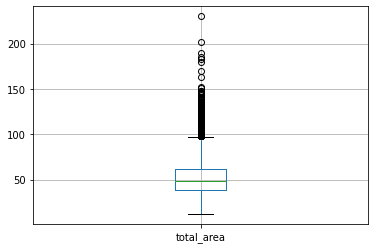

In [36]:
data.boxplot('total_area');

**Квартиры с плодью более 97 квадратных метров являются выбросами, посмотрим на их количество**

In [37]:
len(data.query('total_area>97'))

420

In [38]:
#Оставляем квартиры площадью <= 97 кв.м.
data = data.loc[data['total_area']<=97]

In [39]:
len(data)

20244

**В итоге у нас осталось 20244 наблюдей от начальных 23699**

**В исходных данных были обнаружены пропущенные значения в колонках с высотой потолков, количесвтом этажей в доме, жилой и кухонной площадями, апартаменты, в колонке с количеством балконов, названияем населенного пункта, с расстояниями до ближайшего аэропорта, парка, до центра города, до ближайщего водоема, в колонках с количеством парков и водоемов в радиусе 3000 метров, также пропуски в колонке с количеством дней, прошедших после размещения обявления, большинство пропусков были заполнены, но осталось много пропущенных значений.**

**Явных дубликатов не было обнаружено, но были удалены неявные дубликаты из столбца с названиями населенных пунктов, выбросы в столбцах с высотой потолков, ценами на квартиры, общей, жилой и кухонной площадями.**  

### Посчитайте и добавьте в таблицу новые столбцы

In [40]:
#Добавляем столбец с ценой одного квадратного метра
data['price_per_meter'] = data['last_price'] / data['total_area']

In [41]:
#Добавляем столбец с днем недели публикации объявления
data['week_day'] = data['first_day_exposition'].dt.weekday

In [42]:
#Добавляем столбец с месяцем публикации объявления
data['month'] = data['first_day_exposition'].dt.month_name()

In [43]:
#Добавляем столбец с годом публикации объявления
data['year'] = data['first_day_exposition'].dt.year

In [44]:
#Добавляем столбец с типом этажа с помощью функции
def floor_type(data):
    floor = data['floor']
    if floor == 1:
        return 'первый'
    elif floor == data['floors_total']:
        return 'последний'
    else:
        return 'Другой'
data['floor_type'] = data.apply(floor_type, axis = 1)

In [45]:
#Добавляем столбец с расстоянием до центра города в километрах 
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round(0)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')

### Проведите исследовательский анализ данных

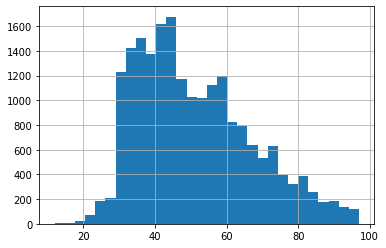

In [46]:
#Строим гистограмму для общей площади квартиры
data['total_area'].hist(bins=30);

**Больше всего квартир площадью 30-60 квадратных метров, наибольшее количество квартир площадью около 45 квадратных метров, меньше всего квартир площадью менее 30 и более 85 квадратных метров**

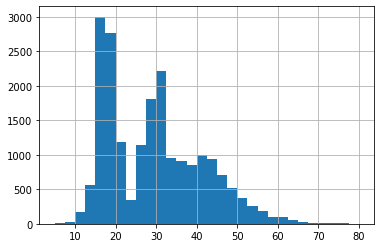

In [47]:
#Строим гистограмму для жилой площади квартиры
data['living_area'].hist(bins=30, range=(5,80));

**Есть большие пики квартир с жилой площадью 15-20 квадратных метров, их около 5800, в промежутке 20-30 метров меньше всего квартир с площадью около 22,5-25 квадратных метров, всего их около 300, еще два пика у квартир с площадью 27,5-32,5 метра, много квартир в промежутке 32,5-45 метров(около 4500), далее, с возрастанием площади, количество квартир уменьшается, меньше всего квартир с жилой площадью менее 12,5 и более 55 квадратных метров** 

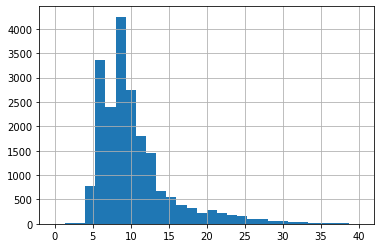

In [48]:
#Строим гистограмму для площади кухни
data['kitchen_area'].hist(bins=30, range=(0,40));

**В основном в квартирах площадь кухни занимает 5-11 квадратных метра, также много квартир с площадью кухни 11-13 метров, квартир, где кухня занимает менее 5 и более 13 метров меньше всего**

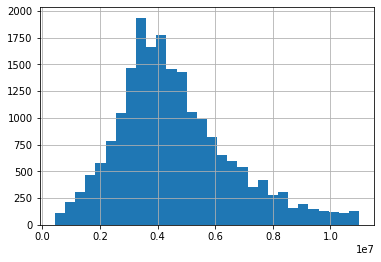

In [49]:
#Строим гистограмму для цен
data['last_price'].hist(bins=30);

**Квартиры в оснвном стоят 3-5 миллионов рублей, количество квартир, которые дешевле и дороже данного диапазона постепенно уменьшается** 

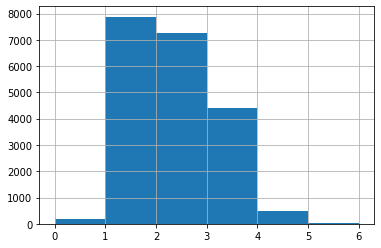

In [50]:
#Строим гистограмму для количества комнат
data['rooms'].hist(bins=6);

**Больше всего однокомнатных квартир, их почти 8000, немного меньше двухкомнатных, около 7300, количество трехкомнатных квартир чуть меньше 4500, меньше всего же квартир с 0,4,5,6 комнатами, их общее количество не превышает 1000**

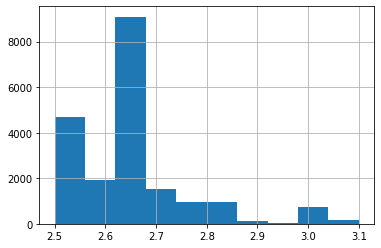

In [51]:
#Строим гистограмму для высоты потолков
data['ceiling_height'].hist(bins=10);

**В основном потолки во всех квартирах около 2.65 метров, также много квартир c высотой потолков 2.5-2.55 метров, остальных значений меньше**

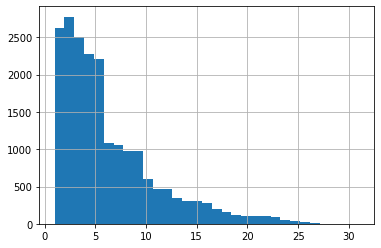

In [52]:
#Строим гистограмму для этажей квартир
data['floor'].hist(bins=31);

**Большинство квартир находятся на 1-5 этажах, для каждого этажа их более 2000, примерно по 1000 квартир с этажами 6-9, далее количество квартир уменьшается с возрастанием этажа** 

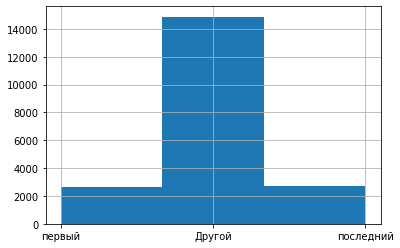

In [53]:
#Строим гистограмму для типов этажей
data['floor_type'].hist(bins=3);

**Более 14500 квартир находятся не на первом и не на последнем этаже, квартир, которые находятся на первом или на последнем этаже, более 5000 в сумме**

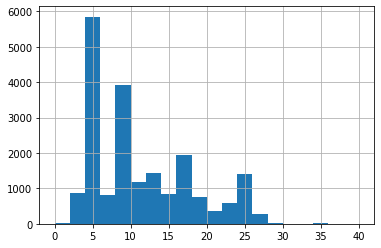

In [54]:
#Строим гистограмму для этажности домов
data['floors_total'].hist(bins=20, range = (0,40));

**Большинство квартир находятся в домах с 5 и 9 этажами**

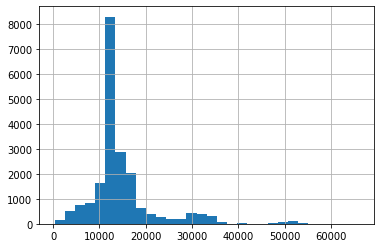

In [55]:
#Строим гистограмму для расстояний от дома до центра города в метрах
data['cityCenters_nearest'].hist(bins=30);

**Пик находится на промежутке 11000-14000 метров, квартир на этом расстоянии от центра более 8000, также около 5000 квартир находится на расстоянии 14000-19000 метров, с уменьшением и возрастанием расстояния до центра от этих диапазонов, количество квартир уменьшается**

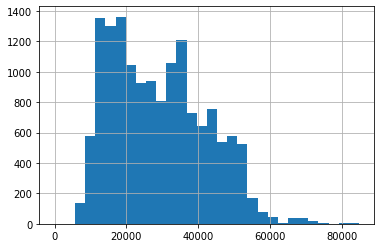

In [56]:
#Строим гистограмму для расстояний от дома до аэропорта
data['airports_nearest'].hist(bins=30);

**Много домов находится на расстоянии 11-20 километров от аэропорта, основная масса домов находится на расстоянии от 9 до 54 километров до аэропортов, домов, находящихся ближе и дальше не много**

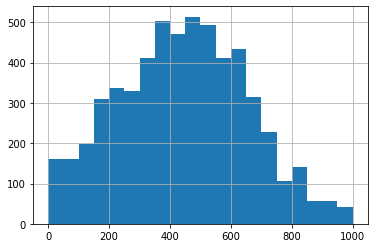

In [57]:
#Строим гистограмму для расстояний от дома до ближайшего парка
data['parks_nearest'].hist(bins=20, range =(0,1000));

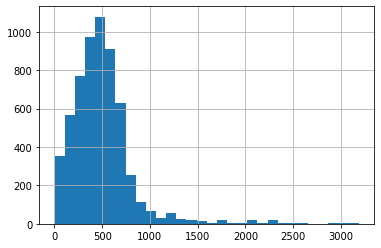

In [58]:
data['parks_nearest'].hist(bins=30);

**Большинство домов находится на расстоянии до 750 метров до ближайщего парка, многие дома расположены в 350-550 метрах от парка, домов, отдаленных от парка более чем на 950 метров, совсем мало**

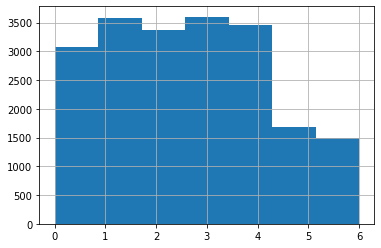

In [59]:
#Строим гистограмму для дня публикации объявления
data['week_day'].hist(bins=7);

**В выходной день публикуется в среднем в два раза меньше объявлений, чем в будний день, причем из будних дней в понедельник публикуется меньше всего объявлений**

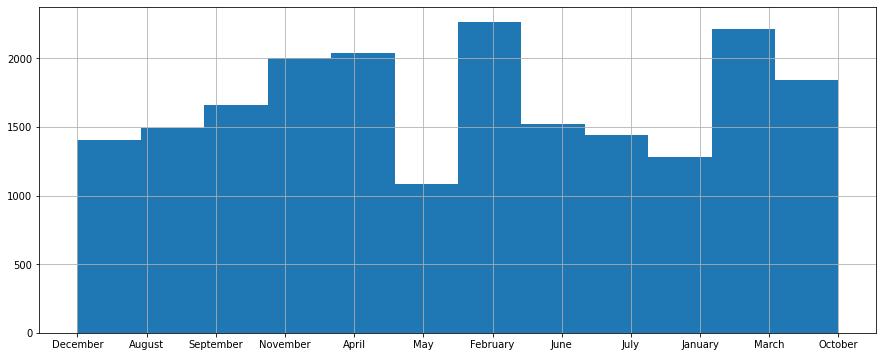

In [60]:
#Строим гистограмму для месяца публикации объявления
data['month'].hist(bins=12, figsize=(15,6));

**Меньше всего объявлений публикуется в мае, больше всего в феврале**

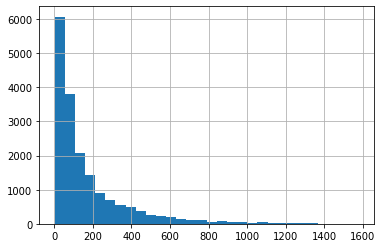

In [61]:
data['days_exposition'].hist(bins=30);

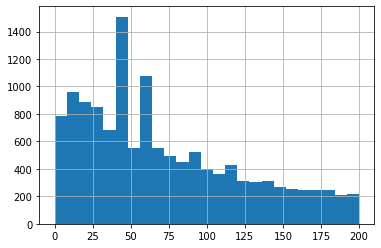

In [62]:
data['days_exposition'].hist(bins=25, range=(0,200));

**Большинство квартир продается в первые четыре месяца после публикации объявления, есть большие пики в районе 40-50 дней и в районе 55-65 дней, в основном чем дольше висят объявления, тем меньше продается квартир**

In [63]:
data['days_exposition'].describe()

count    17866.000000
mean       168.716277
std        206.807987
min          1.000000
25%         43.000000
50%         89.000000
75%        213.000000
max       1580.000000
Name: days_exposition, dtype: float64

**В среднем квартиры продаются 169 дней, медианное значение - 89 дней, есть квартира, которая была продана за 1 день, а есть квартира, которая продавалась почти 4,5 года**

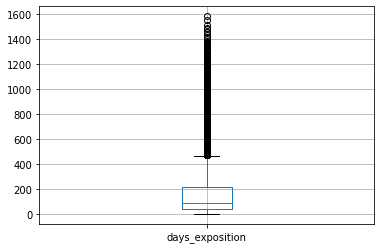

In [64]:
#Построим диаграмму размаха
data.boxplot('days_exposition');

**Продажи, которые занимали более 468, можно назвать долгими** 

In [65]:
print('Таких продаж было:', len(data.query('days_exposition>468')))

Таких продаж было: 1509


**Изучим зависимость цен на квартиры и разных факторов**

In [66]:
#Коэффициент корреляции цены и общей площади
data['last_price'].corr(data['total_area'])

0.6571955345514696

**Коэффициент корреляции равен 0.66, т.е. зависимость есть, посмотрим на диаграмму рассеяния**

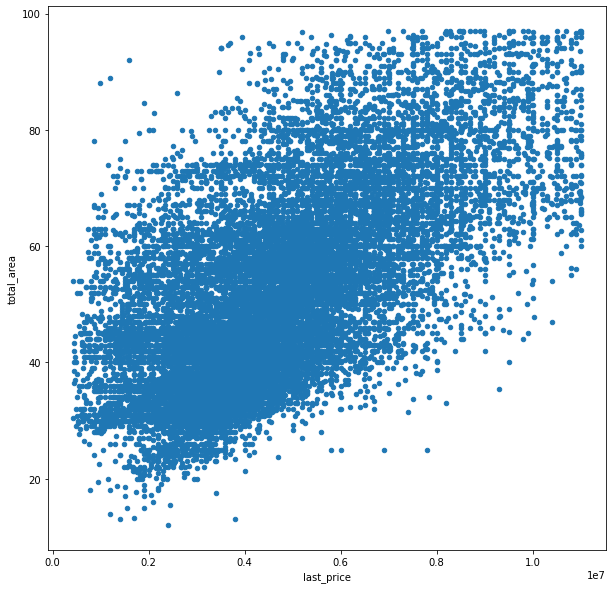

In [67]:
data.plot(x='last_price', y='total_area', kind='scatter', figsize=(10, 10));

**В основном чем больше площадь квартиры, тем выше цена, но есть много квартир, в которых с увеличением площади квартиры цена не увеличивается и наоборот**

In [68]:
#Коэффициент корреляции цены и жилой площади
data['last_price'].corr(data['living_area'])

0.5102545121973507

**Есть зависимость, но небольшая**

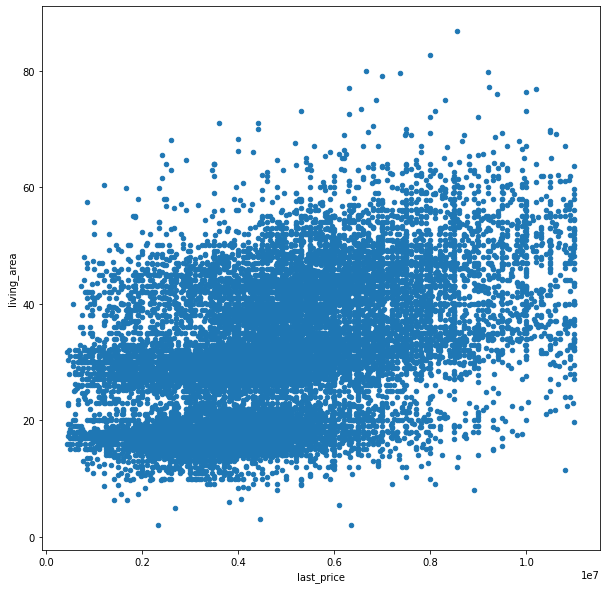

In [69]:
data.plot(x='last_price', y='living_area', kind='scatter', figsize=(10, 10));

**На графике зависимость также явно не выражается, много дорогих квартир имеют малую жилую площадь, также много дешевых квартир имеют большую жилую площадь**  

In [70]:
#Коэффициент корреляции цены и площади кухни
data['last_price'].corr(data['kitchen_area'])

0.32712278214843904

**Коэффициент корреляции низкий, зависимости цены от площади кухни практически нет**

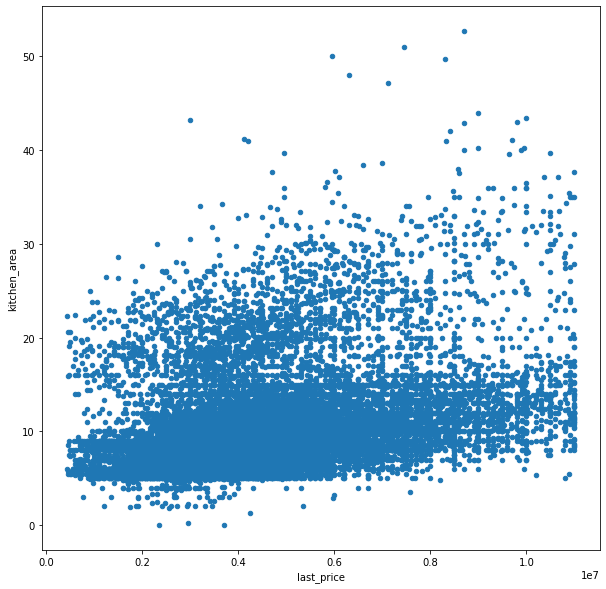

In [71]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', figsize=(10, 10));

**На графике также видно, что площадь кухни редко влияет на цену квартиры**

**Посмотрим на зависимость цены квартиры от количества комнат**

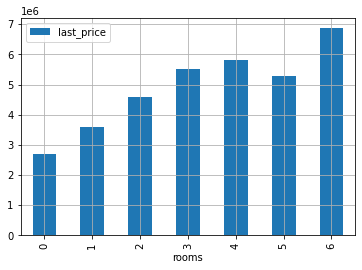

In [72]:
#Создаем сводную таблицу с медианной ценой по количеству комнат  
pivot_price_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median')
pivot_price_rooms.plot(kind='bar', grid = True);

**Почти все квартиры стоят дороже с увеличением числа комнат, единственным исключением являются пятикомнатные квартиры, они стоят дешевле трехкомнатных и четырехкомнатных**

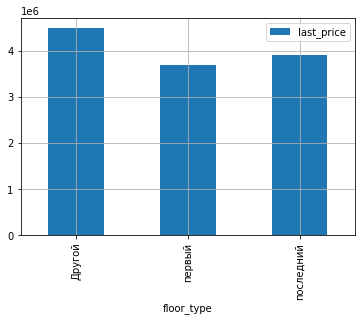

In [73]:
#Создаем сводную таблицу с медианной ценой по типу этажа 
pivot_price_floor = data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = 'median')
pivot_price_floor.plot(kind='bar', grid = True);

**Квартиры, находящиеся на первом этаже стоят дешевле всего, а квартиры, находящиеся не на первом и не на последнем этажах в основном стоят дороже всего**

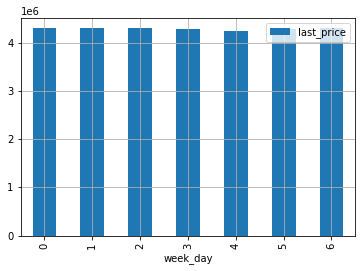

In [74]:
#Создаем сводную таблицу с медианной ценой по дню публикации объявления
pivot_price_day = data.pivot_table(index = 'week_day', values = 'last_price', aggfunc = 'median')
pivot_price_day.plot(kind='bar', grid = True);

**День публикации объявления практически никак не влияет на цену квартиры**

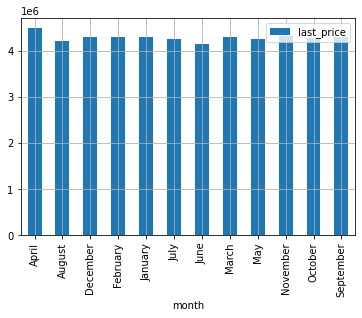

In [75]:
#Создаем сводную таблицу с медианной ценой по месяцу публикации объявления
pivot_price_month = data.pivot_table(index = 'month', values = 'last_price', aggfunc = 'median')
pivot_price_month.plot(kind='bar', grid = True);

**Квартиры, объявления на которые выставлялись в апреле, продавались немного дороже, по сравнению с остальными месяцами, но разница небольшая, так что можно сказать, что месяц публикации никак не влияет на цену квартиры**

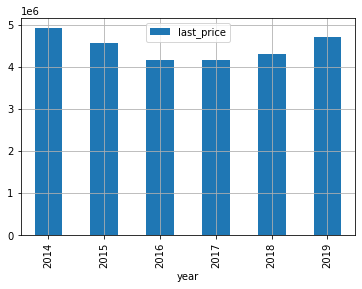

In [76]:
#Создаем сводную таблицу с медианной ценой по году публикации объявления
pivot_price_year = data.pivot_table(index = 'year', values = 'last_price', aggfunc = 'median')
pivot_price_year.plot(kind='bar', grid = True);

<div class="alert alert-info">
Добавил график с медианными значениями площади квартир по годам

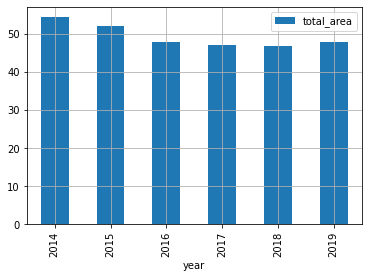

In [77]:
pivot_area_year = data.pivot_table(index = 'year', values = 'total_area', aggfunc = 'median')
pivot_area_year.plot(kind='bar', grid = True);

**Дешевле всего квартиры продавались в 2016 и 2017 годах, немного дороже в 2018, еще дороже в 2015, 2019 и 2014 годах соответственно**

In [78]:
localities = list(data['locality_name'].value_counts().head(10).index) #создаем список населенных пунктов с наибольшим числом объявлений
pivot1 = data.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc = 'mean') #создаем сводную таблицу с населенными пунктами и средней ценой за 1 кв.м.
pivot1 = pivot1.loc[pivot1.index.isin(localities)] #выбираем те населенные пункты, которые входят в список 'localities'
pivot1.sort_values(by='price_per_meter', ascending = False) #сортируем таблицу по убыванию

,price_per_meter
locality_name,
Санкт-Петербург,105305.469833
Пушкин,100406.148067
Кудрово,95211.008966
Парголово,90641.010283
Мурино,86145.213913
Шушары,78765.715097
Колпино,75434.836312
Гатчина,68523.238914
Всеволожск,67109.527389


**Из топ-10 населенных пунтов по объявлениям цена за один квадратный метр выше всего в Санкт-Петербурге, а ниже всего в Выборге**

In [79]:
#Создаем сводную таблицу для Санкт-Петербурга со средней стоимостью 1 кв.м. по каждому километру до центра города
data.loc[data['locality_name']=='Санкт-Петербург'].pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_meter', aggfunc = 'mean').sort_values(by='price_per_meter', ascending=False)

,price_per_meter
cityCenters_nearest_km,
5,125623.201513
6,124251.187759
1,120210.379377
4,118479.927066
2,118214.219943
7,116648.376021
8,116252.828532
0,110780.312125
3,110722.318045


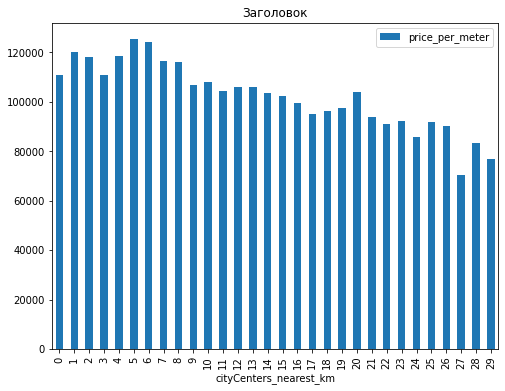

In [81]:
pivot_avgprice = data.loc[data['locality_name']=='Санкт-Петербург'].pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_meter', aggfunc = 'mean').sort_values(by='price_per_meter', ascending=False)
pivot_avgprice.sort_values(by = 'cityCenters_nearest_km').plot(kind = 'bar', figsize = (8,6), title = 'Заголовок');

**В основном цена квадратного метра уменьшается по степени удаленности от центра города, но не всегда, например, цена в центре города ниже, чем в 1-2 и 4-8 километрах от центра**

**Цены на квартиры в основном зависят от общей площади, количества комнат и от того на каком этаже находится квартира, также средняя цена за квадратный метр отличается в разных населенных пунктах, в Санкт-Петербурге она еще и завсист от степени удаленности от центра**

### Общий вывод

**В начальных данных были обнаружены пропуски и неявные дубликаты, в проекте была выполнена предобработка данных, заполнены пропуски там, где это было возможно, удалены дубликаты и выбросы, исследованы различные параметры данных и зависимости цен на квартиры от различных факторов**

**В Санкт-Петербурге и соседних населенных пунктах за период 2014-2019 годов в большинстве объявлений на продажу были выставлены квартиры с площадью 30-60 квадратных метров, с жилой площадью 15-20 и 27,5-32,5 квадратных метра, с площадью кухни 5-13 квадратных метра.**

**Большинство квартир находились в ценовом диапазоне 3-5 миллионов рублей, больше всего было выставлено 1-комнатных квартир, также много выставлено 2-х и 3-х комнатных квартир, почти во всех квартирах высота потолков около 2.65 метров.**

**Выставленные на продажу квартиры находятся в основном на 1-5 этажах, также много квартир на 6-9 эатажах, большинство квартир находятся не на первом и не на последнем этажах, выставленные квартиры в большинстве случаев находятся в пятиэтажных и девятиэтажных домах.**

**Большая часть квартир находится на расстоянии 11-14 километров от центра города, многие дома находятся на расстоянии 11-20 километров от аэропорта, расстояние до ближаешего парка от домов в среднем составляет 350-550 метров, и количество домов уменьшается по мере уменьшения или увеличения расстояния от этого диапазона.**

**В выходной день публикуется в среднем в два раза меньше объявлений, чем в будний день, причем из будних дней в понедельник публикуется меньше всего объявлений, также меньше всего объявлений публикуется в мае, больше всего в феврале.**

**Чаще всего квартиры продавались за 40-50 и 55-65 дней после публикации объявления, большинство квартир продается за первые четыре месяца, но есть квартиры, которые продавались в первые дни или были проданы более чем через четыре года.**

**Стоимость квартиры часто зависит от ее общей площади, но зависимоть цены от площади кухни и жилой площади прослеживается слабо. Также на цену влияет количество комнат, чем их больше, тем медианная цена на квартиру выше, за исключением пятикомнатных квартир, они стоят дешевле 3-х и 4-х комнатных. Медианная цена выше у квартир, находящихся не на первом и не на последнем этаже, при этом цена на квартиры, находящихся на первом этаже ниже, чем на квартиры, находящихся на последнем. А вот день и месяц публикации объявления практически не сказываются на цене квартиры, только в годе публикации прослеживается зависимость: дороже всего квартиры продавались в 2014 году, далее в 2015-2017 годах идет спад цен, что вызвано уменьшением площадей выставляемых на продажу квартир, в 2018-2019 годах не происходит увелечение медианной площади выставляемых квартир, но идет рост цен.**

**Больше всего объявлений было выставлено в таких населенных пунктах, как Санкт-Петербург, Пушкин, Кудрово, Парголово, Мурино, Шушары, Колпино, Гатчина, Всеволожск, Выборг. Расположены они по убыванию цены за один квадратный метр.**

**Зачастую цена за квадратный метр в Санкт-Петербурге уменьшается с каждым километром от центра города, дороже всего стоимость квадратного метра в центре или в 1-10 километрах от центра, там она варьируется в районе 107-126 тысяч за квадратный метр, на расстоянии же 27-29 километров от центра средняя цена за квадратный метр 70-83 тысячи рублей.**